In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# lda = pd.read_csv('./result/npmi_lda_optimization says 16.csv',)
lda = pd.read_csv('./result/npmi_LDA_version2.csv',)
stm = pd.read_csv('./result/npmi_STMprevalence_platform+author.csv')#still working on it
# bert = pd.read_csv('./result/npmi_bertopic_min_topic_size=70_min_samples=20.csv') 
bert = pd.read_csv('./result/npmi_bertopic_min_topic_size=70_min_samples=20_ver3.csv') 

#select 5-30 only
bert = bert[bert.n_topics<=30]
scholar = pd.concat([pd.read_csv('./result/npmi_scholar_prior_covar_author+platform_e50.csv'),
                    pd.read_csv('./result/npmi_scholar_prior_covar_author+platform_21_30_e50.csv')])
stm

#make stm work for 30

,Unnamed: 0,n_topics,npmi_average
0,0,5,0.081306
1,1,6,0.082384
2,2,7,0.091156
3,3,8,0.081466
4,4,9,0.083769
5,0,10,0.085761
6,1,11,0.085199
7,2,12,0.088252
8,3,13,0.078968
9,4,14,0.080659


In [3]:
#use normalize and accumalative 
df = lda[['n_topics','npmi_average']].copy().rename(columns={'npmi_average':'lda'})
# df['stm'] = np.mean(stm.npmi_average)
# df.loc[5:26,'stm'] = list(stm.npmi_average)
df['stm'] = list(stm.npmi_average)
df['bert']= bert.npmi_average
df['scholar']= list(scholar.npmi_average)
df['cumulative'] = np.sum(df.values[:,1:],axis=1)
df['normalized_cumulative'] = np.sum([(df.values[:,i] - min(df.values[:,i]) ) / 
                                      (max(df.values[:,i]) - min(df.values[:,i])) \
                               for i in range(1,5)],axis=0)
df


,n_topics,lda,stm,bert,scholar,cumulative,normalized_cumulative
0,5,0.063258,0.081306,0.135982,0.027340,0.307886,2.357538
1,6,0.067491,0.082384,0.084628,-0.007215,0.227287,1.289747
2,7,0.072406,0.091156,0.080435,0.010750,0.254747,2.229040
3,8,0.079418,0.081466,0.075183,0.038427,0.274494,2.751606
4,9,0.074841,0.083769,0.076738,0.034066,0.269414,2.504482
5,10,0.066045,0.085761,0.065599,0.036229,0.253634,1.963555
6,11,0.062442,0.085199,0.058725,0.039678,0.246044,1.709666
7,12,0.070698,0.088252,0.069457,0.017776,0.246183,2.014003
8,13,0.069424,0.078968,0.059060,0.013474,0.220926,1.354993
9,14,0.073380,0.080659,0.081863,0.000988,0.236890,1.698312


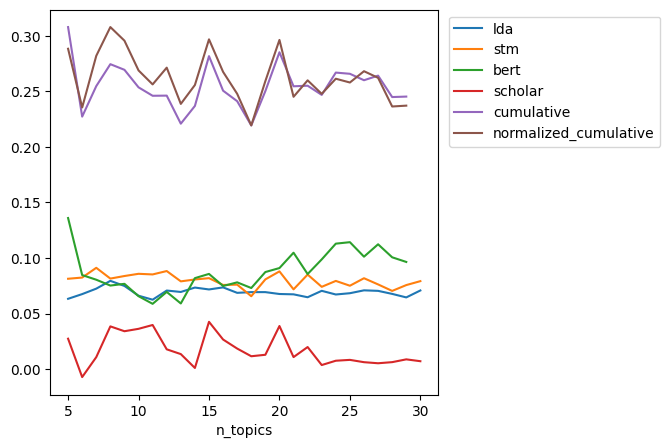

In [4]:
#make multiple lines
df.normalized_cumulative = (max(df.cumulative)-min(df.cumulative)) * \
                        ((df.normalized_cumulative-min(df.normalized_cumulative)) / \
                                 (max(df.normalized_cumulative) - min(df.normalized_cumulative)) )+ min(df.cumulative)
df.plot(x='n_topics', figsize=(5, 5))
plt.legend(bbox_to_anchor=(1.01, 1))

topic number comparison using NPMI and error bar

<Axes: xlabel='model', ylabel='NPMI'>

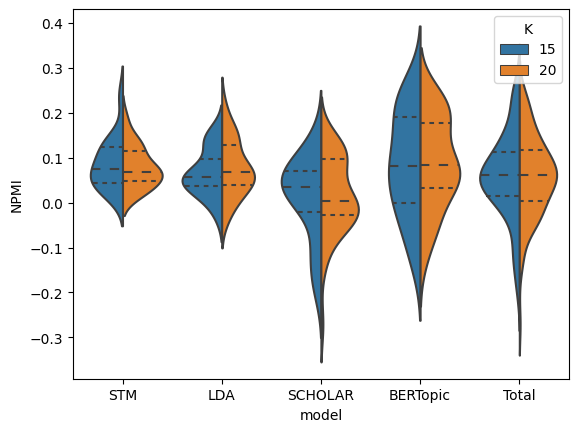

In [38]:
stm_15 = [0.23723876028236396,
 0.09918884702556263,
 0.1170347620408559,
 0.032835414663769075,
 0.06366761120880692,
 0.03715469320411265,
 0.13118540001151766,
 0.04933552085003643,
 0.13404617428099547,
 0.01530251265845346,
 0.06222344249468611,
 0.03415007869771329,
 0.13539021375125543,
 0.07860647927910262,
 0.0750637338788459]
stm_20 = [0.14661179232425636,
 0.0827940446535575,
 0.02640560947663075,
 0.06705285784805451,
 0.1879616578076736,
 0.05333194382709543,
 0.04661402400553637,
 0.06642151726945562,
 0.04941591081266641,
 0.06575518964474451,
 0.02171153290872651,
 0.026314725315143825,
 0.1284468552711538,
 0.11741148636288712,
 0.13367037456316713,
 0.022411576697326706,
 0.11515973703479171,
 0.07027908234814143,
 0.08719285187483036,
 0.07240506925533252]

topic_df = pd.DataFrame([{'model':'STM','NPMI':t,'K':15} for t in stm_15])
topic_df = pd.concat([topic_df,pd.DataFrame([{'model':'STM','NPMI':t,'K':20} for t in stm_20])],ignore_index=True)


lda_15 = [0.1441754004539279,
 0.13491360740802424,
 0.12104071317160592,
 0.04117832923764966,
 0.03332781262411064,
 0.06094717518804471,
 0.05642877407725355,
 0.15673889872183858,
 0.056619260515084084,
 -0.02626313132755194,
 0.01167053235922938,
 0.020363413430548774,
 0.06582561223778154,
 0.04582837050602602,
 0.07458560980524624]

lda_20 = [0.07506996585046208,
 0.049644092612943405,
 0.009880386228772832,
 0.1253221899449114,
 -0.010037304387919535,
 0.057200124251534645,
 0.21090111529192032,
 0.02724376964716412,
 0.06916771147687245,
 0.13909212110820213,
 0.15510999618267374,
 0.1562043110198418,
 0.1506851530805242,
 0.07532521680224621,
 0.04465985398791468,
 0.02747012641429267,
 0.05651805715952926,
 0.0786175854324044,
 -0.03232326674211138,
 0.06673941143433379]

topic_df = pd.concat([topic_df,pd.DataFrame([{'model':'LDA','NPMI':t,'K':15} for t in lda_15])],ignore_index=True)
topic_df = pd.concat([topic_df,pd.DataFrame([{'model':'LDA','NPMI':t,'K':20} for t in lda_20])],ignore_index=True)

scholar_15 = [0.08363710163441888,
 0.09536269262385405,
 0.014807530076665144,
 0.0807038242210371,
 0.07143206221820586,
 -0.16901626650251106,
 0.0694232674180605,
 0.03765610200318646,
 -0.002312089942119287,
 -0.11289992642901678,
 0.15643955478428978,
 0.060430396598753267,
 0.027523855407139745,
 -0.20679153669508676,
 -0.03346594584877899,
 0.03326057678929886,
 0.04298704497145799,
 0.1377756112011585,
 0.01564966397339573,
 -0.09330109690962693,
 0.03731141799367244,
 0.02471349132218623,
 0.04550883488972131,
 -0.0015664171892145545,
 -0.02751632664690639,
 -0.1686602721382874,
 0.06409884986676105,
 -0.11639578879218801,
 0.0991080358266072,
 0.10726148453480086]

scholar_20 = [0.09685393270085857,
 0.12656851206291242,
 0.11886637709010803,
 -0.025591213654058993,
 0.1085025888127502,
 -0.0607100961155991,
 0.006659007207374072,
 0.04036506477240433,
 0.09302389957871654,
 0.12218751911627852,
 -0.04776727086894111,
 -0.02787851478026393,
 0.031140528465298727,
 -0.011251977850761687,
 -0.1339332295540973,
 -0.028004147217297153,
 -0.06292129906384983,
 -0.01302843065227283,
 -0.015775202672050362,
 0.005142737213985978,
 0.09578140522057346,
 0.12325675655176953,
 -0.12281202421995419,
 -0.022452154859822993,
 -0.016764335425496463,
 -0.05444284530780153,
 0.15176352660265496,
 0.1350224100661331,
 -0.01682312501056764,
 -0.27099536236007127,
 4.390003727696009e-05,
 0.02350892952304666,
 0.007402782493653702,
 0.0594180145912793,
 0.09911839216865972,
 -0.008286711486079592,
 0.07053071390844588,
 -0.06978559253865975,
 -0.05651867073853639,
 0.10891280391230823]

topic_df = pd.concat([topic_df,pd.DataFrame([{'model':'SCHOLAR','NPMI':t,'K':15} for t in scholar_15])],ignore_index=True)
topic_df = pd.concat([topic_df,pd.DataFrame([{'model':'SCHOLAR','NPMI':t,'K':20} for t in scholar_20])],ignore_index=True)

bert_20 = [
 0.24729234648077636,
 0.17613900012089984,
 0.054646723020049845,
 0.09584414458054007,
 0.03533597717595468,
 0.07881368811967303,
 0.04864595573531919,
 0.042177086865854425,
 -0.024768980463159798,
 0.02189293109445127,
 0.2020552858481163,
 -0.04676215308826567,
 -0.13282571031544657,
 0.16579156578268545,
 0.0930445831748109,
 0.23125789256726842,
 0.24358524804666248,
 -0.06931707277899003,
 0.04446052020253007,
 0.1771146060556888,
 0.20614837825263485,
 0.06252582329040796,
 0.10059458724537912,
 0.22617363223767037,
 0.16621298051324485,
 0.04608794406270484,
 0.10130284570886304,
 0.07520014834702632,
 0.049925761438555157,
 0.025947142247112438,
 -0.02648302818596424,
 0.20831191884741485,
 -0.043880635516283815,
 -0.10048769866753954,
 -0.049631475074247006,
 0.1623187820025242,
 0.22926556040875629,
 0.08992275687117797,
 0.19346111710870484,
 0.09561834994487084]

bert_15 = [
 0.24662954279492047,
 0.010973329347575222,
 0.14855930621920072,
 0.08200328378352013,
 0.07730050509381484,
 0.0877761086087916,
 0.20208499793193632,
 -0.02842703724973103,
 -0.02020895468073409,
 -0.09991173273301712,
 0.1604860966391307,
 -0.14330236629218865,
 0.2747489913541722,
 0.022247621950357864,
 0.24147687588243855,
 0.22368032397029886,
 -0.0037828651033692006,
 0.03973601783746262,
 0.21112929462868846,
 0.11323397119932233,
 0.08262157201153779,
 0.045078287097975483,
 -0.05140008317002256,
 0.1973576802728442,
 -0.04211531300883544,
 0.06438150466904027,
 -0.11133281654661736,
 0.16897905288763504,
 0.2471197676397725,
 0.10460973187362216]

topic_df = pd.concat([topic_df,pd.DataFrame([{'model':'BERTopic','NPMI':t,'K':15} for t in bert_15])],ignore_index=True)
topic_df = pd.concat([topic_df,pd.DataFrame([{'model':'BERTopic','NPMI':t,'K':20} for t in bert_20])],ignore_index=True)
# topic_df

topic_df_cpy = topic_df.copy()
topic_df_cpy.model = 'Total'
topic_df = pd.concat([topic_df,topic_df_cpy],ignore_index=True)

sns.violinplot(topic_df,x='model',y='NPMI',hue='K',split=True,inner="quart")

# topic selection

In [3]:
ratings = pd.read_csv('./topic_labeling/data_avg_with_NPMI.csv')
# ratings.sort_values('suitable',ascending=False)

<Axes: >

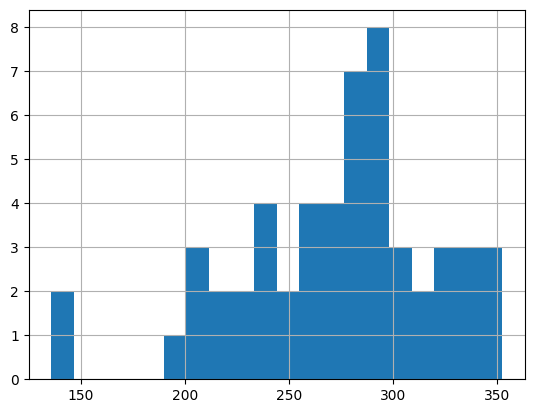

In [10]:
ratings.suitable.hist(bins=20)

In [4]:
rs = ratings.sort_values('suitable',ascending=False)
rs[(rs.corpus == 'ap') & (rs.suitable>=275)]
#we select only from AP with suitable more than 275 and objectionable no higher than 100

,Unnamed: 0,corpus,topicID,technique,Input.topn,Input.doc1,Input.doc2,Input.doc3,Input.doc4,Input.doc5,...,unpredictable,confusing,bestlabel,familiarity,suitable,objectionable,consensus_factor,NPMI_3,NPMI_6,NPMI
22,22,ap,91,TopN,"percent, rate, rates, economy, economic, increase",3 percent in November 1979. It was the sevent...,"At that time, some economists believed that a...",The Commerce Department reported Thursday tha...,"It is good news,'' Copper added. Economists ...",Retail prices in Britain were up 10. 6 percen...,...,10.0,7.6,NaN,34.6,352.388632,64.286895,43.202695,0.277751,0.199594,0.238673
23,23,ap,92,TopN,"music, record, band, theater, show, musical","S. opera debut as Pedrillo, servant of Belmon...",``Deep'' (RCA-BMG) _ Peter Murphy The ``deep'...,Teletron's number is 212-246-0102. Ticketron...,in 1958 but never released. The album closes...,Butterfly'' was chosen best play and ``Into t...,...,19.2,5.6,NaN,26.6,352.248770,76.862574,40.521149,0.151589,0.107102,0.129346
13,13,ap,60,TopN,"space, shuttle, nasa, launch, mission, earth",With Magellan safely in orbit around Venus to...,The National Aeronautics and Space Administra...,'' Project officials believe the spacecraft de...,When the Galileo probe and orbiter reach Jupi...,A set of valleys said to resemble the animate...,...,14.6,12.0,NaN,39.0,339.185197,84.491730,36.846437,0.432835,0.274788,0.353812
11,11,ap,56,TopN,"hospital, medical, health, doctors, patients, ...",Loma Linda Medical Center said Friday has acc...,"``He bronchs them once, he bronchs them twice...",James R. Thompson stepped in and reversed a ...,Hospital officials have accused physicians La...,Doctors at a London hospital said Tuesday nig...,...,20.5,21.5,NaN,28.5,334.283748,75.097161,32.898604,0.299627,0.278104,0.288865
16,16,ap,67,TopN,"lebanon, hostages, beirut, hezbollah, syrian, ...",Families streamed out of the ramshackle 16 sq...,Sources at the Syrian command said the troops...,Hamadi has confessed to the hijacking but den...,Saad renewed his appeal for the release of th...,The dead include 97 soldiers killed since the...,...,51.8,45.8,NaN,25.2,324.634956,193.009466,34.959422,0.319528,0.281363,0.300445
12,12,ap,57,TopN,"police, killed, man, authorities, shot, city","The shots apparently were fired into the air,...",Nine other people were wounded in the shootin...,"m. , three hours after the disturbance by at l...",Demolitions experts disarmed three powerful h...,Gang members returning from a friend's funera...,...,25.8,24.4,NaN,38.6,322.301467,157.035031,40.322516,0.137568,0.086342,0.111955
6,6,ap,30,TopN,"bank, billion, million, money, banks, financial",The Federal Home Loan Bank Board today announ...,William Seidman said Monday. Seidman said a ...,Strauss. First Texas Financial is the parent...,"Through the first nine months of last year, t...",The Treasury Department announced Wednesday i...,...,15.2,8.8,NaN,33.2,316.497229,71.146714,33.469674,0.209952,0.176850,0.193401
17,17,ap,73,TopN,"water, state, species, turkey, fish, river","Martin, a student at Fort Valley State Colleg...",Wood storks have come home to roost in southe...,It's an invasion scientists say could affect ...,A petition is being prepared to ask the U. S....,"Along with Darrell Ubick, an entomologist, Br...",...,40.8,21.2,NaN,29.8,295.614354,92.604983,30.887444,-0.016675,0.056809,0.020067
19,19,ap,80,TopN,"club, members, sweden, irving, women, prize",Pronunciations of the names of some leading Y...,"Zolan Ribli, Hungary, 5. 5 8. Nigel Short, B...","Female guests of members, as well as wives an...","'' However, the statement said, ``The vice pre...",coins. Also Philadelphia is the headquarters...,...,41.0,37.4,NaN,37.6,293.234551,141.666925,24.630502,0.023028,-0.004252,0.009388
18,18,ap,79,TopN,"bush, dukakis, jackson, campaign, president, p...",Former President Carter described Democratic ...,George Bush is a ``toothache of a man'' who d...,"Gore, conceding ``things didn't turn out exac...",Here are the members of the

In [23]:
for _,row in rs[(rs.corpus == 'ap') & (rs.suitable>=275)].iterrows():
    if row.objectionable<=100:
        print('top terms:',row['Input.topn'])
        print(row['Input.doc1'])
        print(row['Input.doc2'])
        print(row['Input.doc3'])
        print(row['Input.doc4'])
        print(row['Input.doc5'])
        print('-----------------------')
    

top terms: percent, rate, rates, economy, economic, increase
3 percent in November 1979.  It was the seventh increase in eight months.  As capacity use edges toward 85 percent, economists fear factories will have trouble producing enough goods to meet demand, leading to shortages and price increases.  In an accompanying report, the Federal Reserve said industrial production climbed a brisk 0. 5 percent in November following an identical 0.
 At that time, some economists believed that a drop in consumer spending would force such steep cuts in production that the country would be pushed into a recession.  Instead, the overall economy expanded at a moderate 2. 3 percent annual rate in the first three months of the year, as measured by the gross national product.  The April report showed that output in the manufacturing sector climbed 0. 7 percent in April, reflecting an increase of 0.
 The Commerce Department reported Thursday that orders for ``big ticket'' durable goods, excluding the vo

In [38]:
orig_df = pd.read_csv('/Users/das-lab/Documents/topicmodelingcore/results/apResults.csv')
orig_df[orig_df['Input.topn'] == 'percent, rate, rates, economy, economic, increase']['Input.topic_sal']
list(orig_df[orig_df['Input.topn'] == 'percent, rate, rates, economy, economic, increase']['Answer.description'])

# np.mean(orig_df[orig_df['Input.topn'] == 'percent, rate, rates, economy, economic, increase']['Answer.topnPreferable']) \
# ,np.mean(orig_df[orig_df['Input.topn'] == 'percent, rate, rates, economy, economic, increase']['Answer.topicSalPreferable']), \
# np.mean(orig_df[orig_df['Input.topn'] == 'percent, rate, rates, economy, economic, increase']['Answer.topSalPreferable']), \
# np.mean(orig_df[orig_df['Input.topn'] == 'percent, rate, rates, economy, economic, increase']['Answer.meiPreferable'])

['These documents are talking about supply and demand. There are mentioned about shortages and meeting demands. Overall, these documents are about economy and inflation.',
 'They all have to do with consumer products and supply and demand. They all cover the economy and consumer goods. They cover the rise and fall in product quantity and prices, as well as inflation.',
 'The main theme I see in these documents is the economy, the manufacturing sector, and consumer spending.',
 'These documents are addressing the increases and decreases in consumer spending, inflation, and reductions in production.',
 'All of these documents refer to an increased economic output.']

In [13]:
list(orig_df.columns)

['HITId',
 'HITTypeId',
 'Title',
 'Description',
 'Keywords',
 'Reward',
 'CreationTime',
 'MaxAssignments',
 'RequesterAnnotation',
 'AssignmentDurationInSeconds',
 'AutoApprovalDelayInSeconds',
 'Expiration',
 'NumberOfSimilarHITs',
 'LifetimeInSeconds',
 'AssignmentId',
 'WorkerId',
 'AssignmentStatus',
 'AcceptTime',
 'SubmitTime',
 'AutoApprovalTime',
 'ApprovalTime',
 'RejectionTime',
 'RequesterFeedback',
 'WorkTimeInSeconds',
 'LifetimeApprovalRate',
 'Last30DaysApprovalRate',
 'Last7DaysApprovalRate',
 'Input.topicid',
 'Input.mei_et_al',
 'Input.topic_sal',
 'Input.top_sal',
 'Input.topn',
 'Input.doc1',
 'Input.doc2',
 'Input.doc3',
 'Input.doc4',
 'Input.doc5',
 'Answer.age',
 'Answer.bestLabel',
 'Answer.birthsex',
 'Answer.description',
 'Answer.education',
 'Answer.familiarity',
 'Answer.gender',
 'Answer.marital',
 'Answer.mars',
 'Answer.meiArbitrary',
 'Answer.meiBiased',
 'Answer.meiCoherence',
 'Answer.meiConsensus',
 'Answer.meiContentious',
 'Answer.meiExpected',